In [ ]:
%%python3 --version

# create a virtual environment and put it in .venv
%python3 -m venv .venv

# start the environment
%source .venv/bin/activate

%pip install -r requirements.txt
%pip install otter-grader

# start vscode in the current directory if you are using that
%code .

UsageError: Line magic function `%python3` not found (But cell magic `%%python3` exists, did you mean that instead?).


In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment1.ipynb")

## Introduction to Pandas and Scikit-Learn

Pandas is a powerful data manipulation and analysis library for Python. It provides data structures like DataFrames and Series that allow for efficient handling of structured data. Pandas is particularly useful for tasks such as reading and writing data in various formats, data cleaning, merging datasets, and performing complex operations on data.

Scikit-learn, on the other hand, is a machine learning library for Python. It provides a wide range of supervised and unsupervised learning algorithms, as well as tools for model selection, evaluation, and preprocessing. Scikit-learn is designed to be user-friendly and efficient, making it a popular choice for both beginners and experienced data scientists.

Together, Pandas and Scikit-learn form a powerful combination for data analysis and machine learning tasks. Pandas is often used to prepare and manipulate data, which can then be fed into Scikit-learn models for training and prediction.

In this assignment, we'll start with the fundamentals of data loading/manipulation in pandas, then move on to basics of scikit-learn.

## Pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's load the **Census Income** dataset which is available on the [UCI ML Dataset Page](https://archive.ics.uci.edu/dataset/20/census+income).

The goal is to predict whether a person's income was greater than $50K based on 1994 census data.

In [ ]:
df = pd.read_csv('adult.csv')

#### Let's take a quick look at the dataset. We'll use the .head() function to view the first 5 records of the dataset.

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Part 1: Data Loading and pre-processing

### Feel free to refer to the course notes on [pandas](https://tools4ds.github.io/DS701-Course-Notes/02B-Pandas.html) for the following questions.

**Question 1a**: Write a function `get_rows_and_columns` that takes as input a CSV filename, loads this file into a Pandas dataframe, and returns a tuple of the number of rows and columns in the dataframe.

In [ ]:
def get_rows_and_columns(file_path):
    df = pd.read_csv(file_path) 
    return df.shape

In [ ]:
get_rows_and_columns('adult.csv')

(48842, 15)

In [ ]:
grader.check("q1a")

q1a results: All test cases passed!

**Question 1b**: Write a function `compute_missing_percentage` that converts '?' to `pd.NA` and returns the percentage of missing data (i.e., NaNs) for each column in the dataset.

The term `pd.NA` is the way to represent [missing values](https://pandas.pydata.org/docs/reference/missing_value.html) (not available) in Pandas.

In [ ]:
def compute_missing_percentage(df):
    df = df.map(lambda x: pd.NA if x=='?' else x)
    rows,cols = df.shape
    counts = df.count(axis = 0)
    return counts.apply (lambda x: (1-(x/rows))*100)

In [ ]:
compute_missing_percentage(df)

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [ ]:
grader.check("q1b")

q1b results: All test cases passed!

**Question 1c**: Write a function `unique_occupation` that returns the number of unique occupation present in the dataset.

In [ ]:
def unique_occupation(df):
    return df['occupation'].nunique()

In [ ]:
unique_occupation(df)

15

In [ ]:
grader.check("q1c")

q1c results: All test cases passed!

**Question 1d**: Write a function `categorical_column_with_max_unique_values` that identifies and returns the index of the **column with maximum number of distinct categorical values** in the dataset.

In [ ]:
def categorical_column_with_max_unique_values(df):
    df = df.loc[:,['workclass','education','occupation','marital-status','relationship','race','native-country']]
    uniques = df.nunique(axis = 0)
    return uniques.idxmax()

In [ ]:
categorical_column_with_max_unique_values(df)

'native-country'

In [ ]:
grader.check("q1d")

q1d results: All test cases passed!

## Part 2: Exploratory data analysis and visualizations

<!-- BEGIN QUESTION -->

**Question 2a**: Write a function `plot_categorical_distribution` to plot the distribution of the column 'education' as a histogram.

You can use Pandas `.plot()` method for this. Look at the DataFrame `.value_counts` method as well. See class examples for how to add labels and titles.

In [ ]:
def plot_categorical_distribution(df):
    df['education'].value_counts(ascending=True).plot(kind='bar',title='Education Distribution',xlabel='Education Level',ylabel='Count')

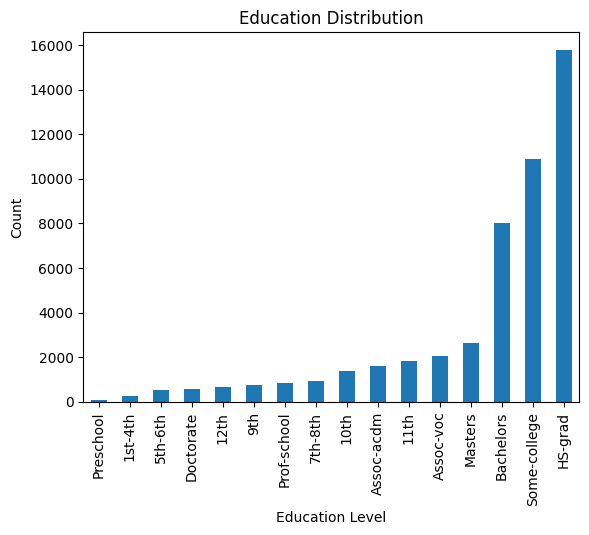

In [ ]:
plot_categorical_distribution(df)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2b**: Write a function `plot_age_hours_scatter` that creates a scatter plot of 'age' vs 'hours-per-week', coloring points by 'income'.

You'll want to look at MatPlotLib's `pyplot.scatter()` for this one.

In [ ]:
def plot_age_hours_scatter(df):
    lowdf = df[df['income'] == '<=50K']
    highdf = df[df['income'] == '>50K']
    plt.scatter(lowdf['age'],lowdf['hours-per-week'],s=4,color='blue',label='<=50K')
    plt.scatter(highdf['age'],highdf['hours-per-week'],s=4,color='green',label='>50K')
    plt.title('Age vs Hours per Week')
    plt.xlabel('Age')
    plt.ylabel('Hours per Week')
    plt.legend()
    plt.show()

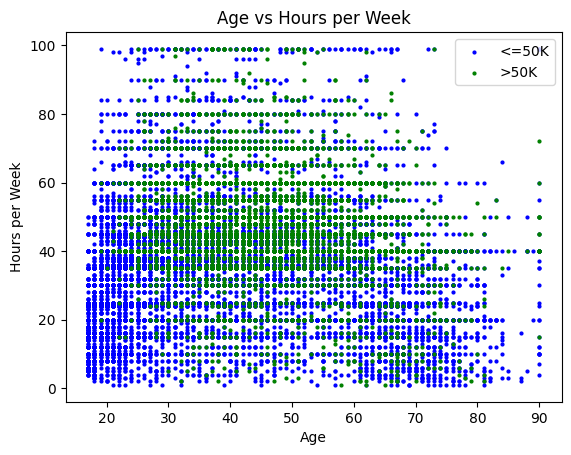

In [ ]:
plot_age_hours_scatter(df)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2c**: Write a function `plot_income_by_marital_status` which plots a stacked bar chart that shows the proportion of income levels for each 'marital-status' category.

In [ ]:
def plot_income_by_marital_status(df):
    return df.groupby('marital-status')['income'].value_counts().unstack().plot(kind='bar',stacked=True)

<Axes: xlabel='marital-status'>

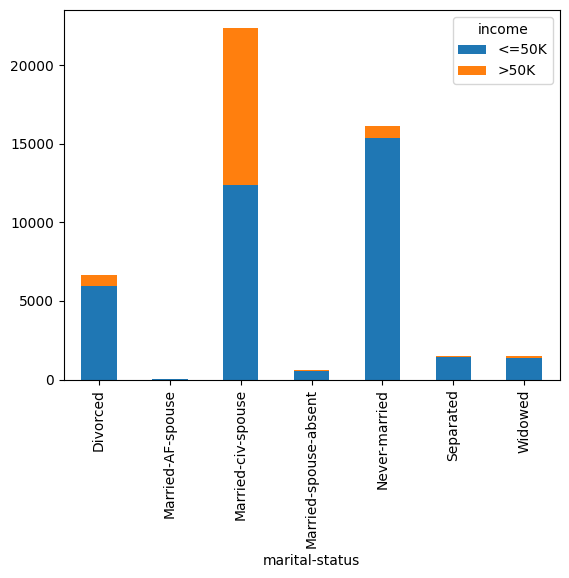

In [ ]:
plot_income_by_marital_status(df)

<!-- END QUESTION -->

## Part 3: Advanced Pandas Operations

**Question 3a**: Write a function `education_stats` that returns a dataframe with mean 'age' and median 'hours-per-week' categorized on the 'education' level.

In [ ]:
def education_stats(df):
    res =  df.groupby('education').agg({'age':'mean', 'hours-per-week':'median'})
    res.reset_index(inplace=True)
    return res

In [ ]:
education_stats(df)

,education,age,hours-per-week
0,10th,37.902808,40.0
1,11th,32.141832,40.0
2,12th,32.235921,40.0
3,1st-4th,46.639676,40.0
4,5th-6th,43.585462,40.0
5,7th-8th,49.525654,40.0
6,9th,40.902116,40.0
7,Assoc-acdm,37.777014,40.0
8,Assoc-voc,38.651140,40.0
9,Bachelors,38.896324,40.0


In [ ]:
grader.check("q3a")

q3a results: All test cases passed!

**Question 3b**: Write a function `calculate_most_popular_occupation` that returns a dataframe of the most popular occupation for each 'native-country' and order them in descending order.

In [ ]:
def calculate_most_popular_occupation(df):
    counts = df.groupby('native-country')['occupation']

    occupations = pd.Series(index=df['native-country'].unique(),dtype=object)
    for country in occupations.index:
       occupations[country] = counts.get_group(country).value_counts().idxmax()
    occupations = occupations.to_frame()
    occupations.columns = pd.Index(['occupation'],dtype='object')
    occupations.index.name = 'native-country'
    occupations.reset_index(inplace=True)
    return occupations

In [ ]:
calculate_most_popular_occupation(df)

,native-country,occupation
0,United-States,Exec-managerial
1,?,Prof-specialty
2,Peru,Other-service
3,Guatemala,Craft-repair
4,Mexico,Other-service
5,Dominican-Republic,Machine-op-inspct
6,Ireland,Craft-repair
7,Germany,Prof-specialty
8,Philippines,Adm-clerical
9,Thailand,Other-service


In [ ]:
grader.check("q3b")

q3b results: All test cases passed!

**Question 3c**: Write a function `workclass_by_income` that returns a dataframe of the top 5 workclass with the highest number of people having income >50K

In [ ]:
def workclass_by_income(df):
     df = df[df['income'] == ">50K"]
     workclass = df['workclass']
     workcounts = workclass.value_counts()
     res = workcounts.to_frame()
     res.columns = pd.Index(['count'],dtype='object')
     res.reset_index(inplace=True)
     return res
     

In [ ]:
workclass_by_income(df)

,workclass,count
0,Private,7387
1,Self-emp-not-inc,1077
2,Self-emp-inc,938
3,Local-gov,927
4,Federal-gov,561
5,State-gov,530
6,?,265
7,Without-pay,2


In [ ]:
grader.check("q3c")

q3c results: All test cases passed!

## Scikit-learn

In [ ]:
# MAKE SURE TO RUN THIS CELL!

import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_new = df.drop(columns=['native-country', 'fnlwgt']).dropna()

In this part, we'll implement [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) using scikit-learn. Logistic regression is used when trying to predict a binary outcome (0 or 1, True or False, etc.) We will go over the details of logistic regression in details later in the course. 

Here, we will try to predict income (>50k or <= 50k>) and follow standard ML procedures for data pre-processing. You can use scikit-learn's documentation, [the lecture notes on scikit-learn](https://tools4ds.github.io/DS701-Course-Notes/02C-Sklearn.html) or online resources for guidance. 

#### From here on use the 'df_new' variable instead of 'df'

We saw in lecture that models are trained on the 'training' set and evaluated on unseen data on the 'testing' set. The dataset has 'feature' (`X_train`, `X_test`) and the 'outcome' (`y_train`, `y_test`) variables. 

**Question 4a:** Write a function called `split_data` that takes a dataframe as its only parameter, splits it into training and test splits and returns them. Use 20% for the testing set. 

Use `train_test_split` to produce the splits. Provide a `random_state` of 42 for reproducibility.

`split_data` should return 4 things: X_train, X_test y_train and y_test. To do that, you need to pass in the X *and* the y (income column) to `train_test_split`.

In [ ]:
def split_data(df):
    ...

In [ ]:
grader.check("q4a")

q4a results:
    q4a - 1 result:
        ❌ Test case failed
        Trying:
            def test_split_data():
                df_new = pd.read_csv('adult.csv').drop(columns=['native-country', 'fnlwgt']).dropna()
                output = split_data(df_new)
                assert len(output) == 4, 'split_data() should return 4 things. Make sure you pass both the X and the y to train_test_split.'
                (X_train, X_test, y_train, y_test) = output
                assert len(X_train) + len(X_test) == len(df_new), 'The splits do not add up to the original data size.'
                assert len(y_train) + len(y_test) == len(df_new), 'The splits do not add up to the original data size.'
                assert np.all(X_train.columns == X_test.columns), 'The columns in X_train and X_test are not the same.'
                assert len(X_train) > 0 and len(X_test) > 0, 'Some of the splits are empty. Make sure you pass the correct values to train_test_split'
                assert len(y_train) > 0 and len(y_test) > 0, 'Some of the splits are empty. Make sure you pass the correct values to train_test_split'
        Expecting nothing
        ok
        Trying:
            test_split_data()
        Expecting nothing
        **********************************************************************
        Line 11, in q4a 0
        Failed example:
            test_split_data()
        Exception raised:
            Traceback (most recent call last):
              File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.2032.0_x64__qbz5n2kfra8p0\Lib\doctest.py", line 1398, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4a 0[1]>", line 1, in <module>
                test_split_data()
                ~~~~~~~~~~~~~~~^^
              File "<doctest q4a 0[0]>", line 4, in test_split_data
                assert len(output) == 4, 'split_data() should return 4 things. Make sure you pass both the X and the y to train_test_split.'
                       ~~~^^^^^^^^
            TypeError: object of type 'NoneType' has no len()

**Question 4b**: Write a function `preprocess_data` that takes X_train, y_train, X_test, and y_test as input (the splits we created earlier!) and does the following:

 - Scale the *numerical* columns using sklearn's `MinMaxScaler` to the range [0,1] for both train and test sets
  
 - Replace "<=50K" with 0 and ">50K" with 1 in both y_train and y_test

 - One-hot encode the categorical columns for both train and test sets. Check the next cell for some hints! 
  
The function should then return the preprocessed X_train, y_train, X_test, and y_test

Refer to the material below and [sklearn course notes](https://tools4ds.github.io/DS701-Course-Notes/02C-Sklearn.html#prepare-the-dataset) for help! 

One hot encoding is a way of turning textual data into numbers, so that models can work with them. 

Pandas has a method called `pd.get_dummies()` that can do one-hot encoding. 

Let's illustrate with an example.  Let's say we are describing 4 people, each
with attribute 'Gender' and 'City' where they reside.

Create a dictionary with 'City' and 'Gender' keys, each with a length 4 list. 

In [ ]:
# Sample DataFrame with categorical columns
data = {'City': ['New York', 'Los Angeles', 'New York', 'Chicago'],
        'Gender': ['Female', 'Male', 'Male', 'Female']}
print(data)

{'City': ['New York', 'Los Angeles', 'New York', 'Chicago'], 'Gender': ['Female', 'Male', 'Male', 'Female']}


We can give that to Pandas `pd.DataFrame()` and it will create a DataFrame with
a City column and a Gender column.

In [ ]:
df = pd.DataFrame(data) 
print(df)

          City  Gender
0     New York  Female
1  Los Angeles    Male
2     New York    Male
3      Chicago  Female


Now we can call `pd.get_dummies` with the dataframe and it will convert each
categorical column into a set of columns with each category and column entries
of True or False (e.g. 1 or 0).

In [ ]:
df_encoded = pd.get_dummies(df, columns=['City', 'Gender'])
# notice how I'm passing in the columns -- you should do this too! Hint: you wrote a function for this earlier. 

In [ ]:
print(df_encoded)

   City_Chicago  City_Los Angeles  City_New York  Gender_Female  Gender_Male
0         False             False           True           True        False
1         False              True          False          False         True
2         False             False           True          False         True
3          True             False          False           True        False


   Notice how now every `City` value has its own column, and that every row with a city has a 1 for that city (row 1 in the old dataframe has New York for the `City`, and row in the new dataframe has a 1 for `City_New York`). Everywhere else you have a 0. 

In [ ]:
def preprocess_data(X_train, X_test, y_train, y_test):
    ...

In [ ]:
grader.check("q4b")

q4b results:
    q4b - 1 result:
        ❌ Test case failed
        Trying:
            def test_correct_X():
                with warnings.catch_warnings():
                    warnings.simplefilter('ignore', FutureWarning)
                    (X_train, X_test, y_train, y_test) = split_data(df_new)
                    (X_train, X_test, y_train, y_test) = preprocess_data(X_train, X_test, y_train, y_test)
                assert np.all(X_train.columns == X_test.columns), 'The columns in X_train and X_test are not the same.'
                assert np.allclose(np.mean(X_train), np.mean(X_test), atol=0.01), 'The mean of every column is not the same in X_train and X_test.'
                assert np.all((X_train >= 0) & (X_train <= 1)), 'X_train has values that are not between 0 and 1.'
                assert np.all((X_test >= 0) & (X_test <= 1)), 'X_test has values that are not between 0 and 1.'
                assert np.all((np.mean(X_train) >= 0) & (np.mean(X_train) <= 1)), 'X_train has columns with mean values not between 0 and 1.'
                assert np.all((np.mean(X_test) >= 0) & (np.mean(X_test) <= 1)), 'X_test has columns with mean values not between 0 and 1.'
        Expecting nothing
        ok
        Trying:
            def test_correct_y():
                splits = train_test_split(df_new.drop(columns='income'), df_new['income'], test_size=0.2, random_state=42)
                (X_train, X_test, y_train, y_test) = splits
                with warnings.catch_warnings():
                    warnings.simplefilter('ignore', FutureWarning)
                    (X_train, X_test, y_train, y_test) = preprocess_data(X_train, X_test, y_train, y_test)
                assert np.all(y_train.isin([0, 1])), 'y_train has values that are not 0 or 1.'
                assert np.all(y_test.isin([0, 1])), 'y_test has values that are not 0 or 1.'
        Expecting nothing
        ok
        Trying:
            test_correct_X()
        Expecting nothing
        **********************************************************************
        Line 20, in q4b 0
        Failed example:
            test_correct_X()
        Exception raised:
            Traceback (most recent call last):
              File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.2032.0_x64__qbz5n2kfra8p0\Lib\doctest.py", line 1398, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4b 0[2]>", line 1, in <module>
                test_correct_X()
                ~~~~~~~~~~~~~~^^
              File "<doctest q4b 0[0]>", line 4, in test_correct_X
                (X_train, X_test, y_train, y_test) = split_data(df_new)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            TypeError: cannot unpack non-iterable NoneType object
        Trying:
            test_correct_y()
        Expecting nothing
        **********************************************************************
        Line 21, in q4b 0
        Failed example:
            test_correct_y()
        Exception raised:
            Traceback (most recent call last):
              File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.2032.0_x64__qbz5n2kfra8p0\Lib\doctest.py", line 1398, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4b 0[3]>", line 1, in <module>
                test_correct_y()
                ~~~~~~~~~~~~~~^^
              File "<doctest q4b 0[1]>", line 6, in test_correct_y
                (X_train, X_test, y_train, y_test) = preprocess_data(X_train, X_test, y_train, y_test)

Let's get to training! Remember, we're trying to predict whether income is more then 50k (>50k), or less than or equal to (<=50k).

**Question 4c:** Write a function called train_model that takes the training splits (X_train and y_train) as its parameters. 

- Initialize the logistic regression model
- Fit it to our data. (Training step)

At the end, return the fitted model. 

You can refer to [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
def train_model(X_train, y_train):
    ...

In [ ]:
grader.check("q4c")

q4c results:
    q4c - 1 result:
        ❌ Test case failed
        Trying:
            def test_train_model():
                df_new = pd.read_csv('adult.csv').drop(columns=['native-country', 'fnlwgt']).dropna()
                (X_train, X_test, y_train, y_test) = split_data(df_new)
                with warnings.catch_warnings():
                    warnings.simplefilter('ignore')
                    (X_train, X_test, y_train, y_test) = preprocess_data(X_train, X_test, y_train, y_test)
                    model = train_model(X_train, y_train)
                return isinstance(model, LogisticRegression)
        Expecting nothing
        ok
        Trying:
            test_train_model()
        Expecting:
            True
        **********************************************************************
        Line 9, in q4c 0
        Failed example:
            test_train_model()
        Exception raised:
            Traceback (most recent call last):
              File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.2032.0_x64__qbz5n2kfra8p0\Lib\doctest.py", line 1398, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4c 0[1]>", line 1, in <module>
                test_train_model()
                ~~~~~~~~~~~~~~~~^^
              File "<doctest q4c 0[0]>", line 3, in test_train_model
                (X_train, X_test, y_train, y_test) = split_data(df_new)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            TypeError: cannot unpack non-iterable NoneType object

Let's evaluate the performance of our model! 

**Question 4d:** Write a function called evaluate_model that takes the fitted model and `X_test`, `y_test` as parameters, runs the model on the testing features (`X_test`) and returns the *accuracy score* of the predictions against the ground truth (`y_test`). 

You can refer to [sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_test, y_test):
    ...

In [ ]:
grader.check("q4d")

q4d results:
    q4d - 1 result:
        ❌ Test case failed
        Trying:
            def test_evaluate_model():
                df_new = pd.read_csv('adult.csv').drop(columns=['native-country', 'fnlwgt']).dropna()
                (X_train, X_test, y_train, y_test) = split_data(df_new)
                with warnings.catch_warnings():
                    warnings.simplefilter('ignore')
                    (X_train, X_test, y_train, y_test) = preprocess_data(X_train, X_test, y_train, y_test)
                    model = train_model(X_train, y_train)
                    model = train_model(X_train, y_train)
                    accuracy = evaluate_model(model, X_test, y_test)
                return bool(np.isclose(accuracy, 0.85, atol=0.1))
        Expecting nothing
        ok
        Trying:
            test_evaluate_model()
        Expecting:
            True
        **********************************************************************
        Line 11, in q4d 0
        Failed example:
            test_evaluate_model()
        Exception raised:
            Traceback (most recent call last):
              File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.2032.0_x64__qbz5n2kfra8p0\Lib\doctest.py", line 1398, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest q4d 0[1]>", line 1, in <module>
                test_evaluate_model()
                ~~~~~~~~~~~~~~~~~~~^^
              File "<doctest q4d 0[0]>", line 3, in test_evaluate_model
                (X_train, X_test, y_train, y_test) = split_data(df_new)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            TypeError: cannot unpack non-iterable NoneType object

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Execute all cells and save the notebook before submitting.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

c:\Users\alber\Desktop\.venv\Lib\site-packages\otter\check\notebook.py:494: UserWarning: Could not locate a PDF to include
  warnings.warn("Could not locate a PDF to include")


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 220404: character maps to <undefined>